In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
df=pd.read_csv('heart (1).csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

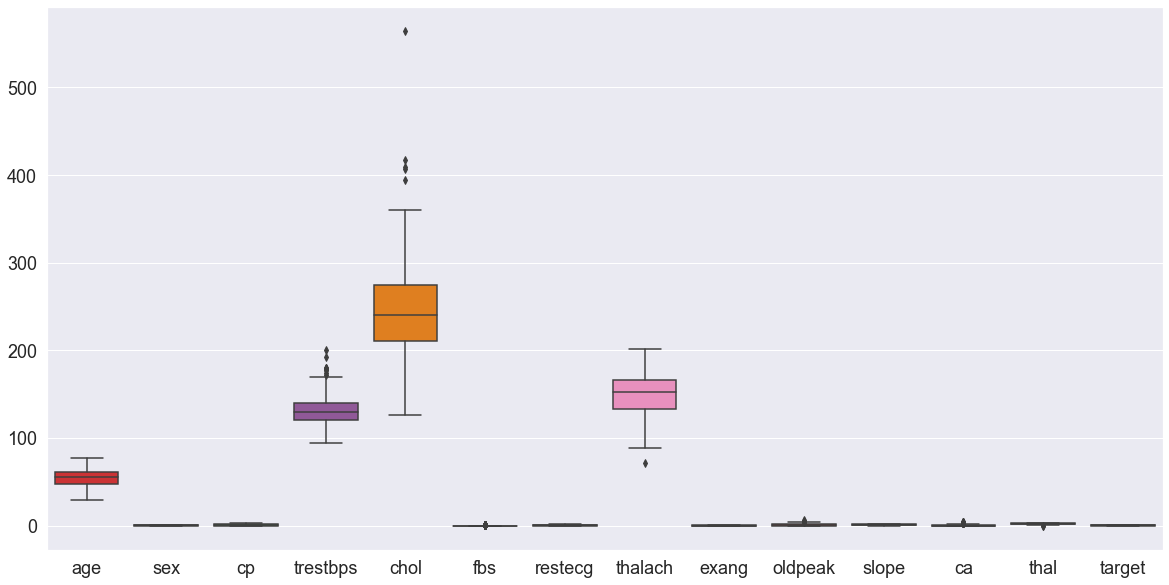

In [6]:
sns.set()
plt.figure(figsize=(20,10))
a=sns.boxplot(data=df,palette="Set1")
a.tick_params(labelsize=18)
plt.show()

In [7]:
lower_limit = df["trestbps"].mean() - 3*df["trestbps"].std()
upper_limit = df["trestbps"].mean() + 3*df["trestbps"].std()

print(lower_limit)
print(upper_limit)

79.00933393568636
184.23819081678892


In [8]:
df2 = df[(df["trestbps"] > lower_limit) & (df["trestbps"] < upper_limit)]

In [9]:
print(df.shape)
print(df2.shape)
df.shape[0]-df2.shape[0]

(303, 14)
(301, 14)


2

In [10]:
lower_limit = df2["chol"].mean() - 3*df2["chol"].std()
upper_limit = df2["chol"].mean() + 3*df2["chol"].std()

print(lower_limit)
print(upper_limit)

90.29311096799373
401.7135335502787


In [11]:
df3 = df2[(df2["chol"] > lower_limit) & (df2["chol"] < upper_limit)]

In [12]:
print(df2.shape)
print(df3.shape)
df2.shape[0]-df3.shape[0]

(301, 14)
(297, 14)


4

In [13]:
lower_limit = df3["thalach"].mean() - 3*df3["thalach"].std()
upper_limit = df3["thalach"].mean() + 3*df3["thalach"].std()

print(lower_limit)
print(upper_limit)

80.62118799114013
218.32830695835486


In [14]:
df4 = df3[(df3["thalach"] > lower_limit) & (df3["thalach"] < upper_limit)]
print(df3.shape)
print(df4.shape)
df3.shape[0]-df4.shape[0]

(297, 14)
(296, 14)


1

In [15]:
print(df.target.value_counts())
print('After')
print(df4.target.value_counts())

1    165
0    138
Name: target, dtype: int64
After
1    163
0    133
Name: target, dtype: int64


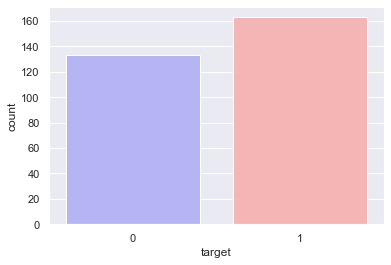

In [16]:
sns.countplot(x="target", data=df4, palette="bwr")
plt.show()

In [17]:
X=df4.drop('target',axis=1)
y=df4['target']
print(X.shape)
print(y.shape)

(296, 13)
(296,)


In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=5)
print(X_train.shape)
print(y_test.shape)

(236, 13)
(60,)


In [22]:
y_dist = Counter(y)
y_train_dist =Counter(y_train)
y_test_dist =Counter(y_test)
print (y_dist)
print (y_train_dist)
print (y_test_dist)

Counter({1: 163, 0: 133})
Counter({1: 130, 0: 106})
Counter({1: 33, 0: 27})


In [23]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [24]:
model1=DecisionTreeClassifier()
model2=LogisticRegression(solver='liblinear',multi_class = 'auto')
model3=RandomForestClassifier()
model4=GaussianNB()
model5=KNeighborsClassifier()
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')

param={'tree__criterion':["entropy","gini"],'tree__max_depth':[5,8,9]
       ,'lg__C': [1,5,10]
       ,'rf__n_estimators':[1,5,10],'rf__max_depth':[5,8,9]
       ,'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}


grid = GridSearchCV(estimator=e_model, param_grid=param, cv=5, verbose=0)
grid = grid.fit(X_train, y_train)

In [25]:
grid.best_params_

{'knn__n_neighbors': 10,
 'lg__C': 1,
 'rf__max_depth': 8,
 'rf__n_estimators': 10,
 'tree__criterion': 'entropy',
 'tree__max_depth': 8}

In [26]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

model1=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=1)
model2=LogisticRegression(solver='liblinear',multi_class = 'auto',C=1,random_state=1)
model3=RandomForestClassifier(max_depth=8,n_estimators=10,random_state=1)
model4=GaussianNB()
model5=KNeighborsClassifier(n_neighbors = 10)
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')



classifiers = [model1,model2,model3,model4,model5,e_model]

for name, model in zip(clf_names, classifiers):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print ("classifier: ", name)
    print ("mean accuracy: ", score)

classifier:  DecisionTree
mean accuracy:  0.75
classifier:  Logistic Regression
mean accuracy:  0.8833333333333333
classifier:  Random Forest
mean accuracy:  0.8166666666666667
classifier:  Naive_bayes
mean accuracy:  0.8333333333333334
classifier:  KNeighbor
mean accuracy:  0.6666666666666666
classifier:  Ensemble
mean accuracy:  0.85


In [27]:
y_pred=model2.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        33

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [29]:
y_pred_tree=model1.predict(X_test)
y_pred_lg=model2.predict(X_test)
y_pred_rf=model3.predict(X_test)
y_pred_nb=model4.predict(X_test)
y_pred_knn=model5.predict(X_test)
y_pred_e=e_model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test,y_pred_tree)
cm_lg = confusion_matrix(y_test,y_pred_lg)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_e = confusion_matrix(y_test,y_pred_e)

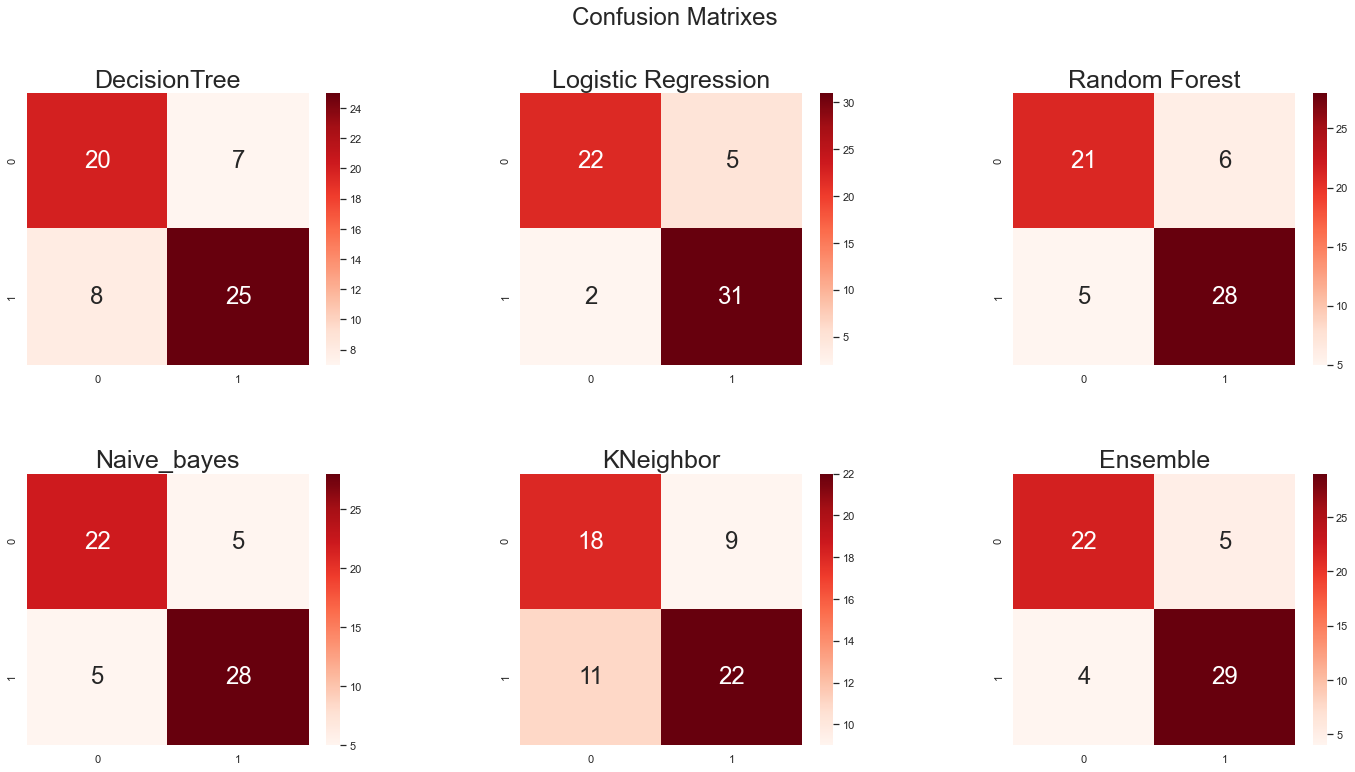

In [31]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("DecisionTree",size=25)
sns.heatmap(cm_tree,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression",size=25)
sns.heatmap(cm_lg,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest",size=25)
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive_bayes",size=25)
sns.heatmap(cm_nb,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("KNeighbor",size=25)
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Ensemble",size=25)
sns.heatmap(cm_e,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.show()

# Feature Importance

In [32]:
corrmatrix = df4[1:].corr()
corrmatrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.087281,-0.077101,0.295426,0.186116,0.112839,-0.106709,-0.401813,0.111198,0.202588,-0.160872,0.283429,0.071255,-0.232300
sex,-0.087281,1.000000,-0.057730,-0.045088,-0.136986,0.062086,-0.083220,-0.041617,0.155013,0.131963,-0.044293,0.147070,0.242425,-0.295407
cp,-0.077101,-0.057730,1.000000,0.061630,-0.098879,0.079504,0.052706,0.293261,-0.391110,-0.145237,0.125128,-0.167877,-0.146078,0.420826
trestbps,0.295426,-0.045088,0.061630,1.000000,0.126727,0.152898,-0.087930,-0.072809,0.061984,0.173160,-0.107487,0.076514,0.041896,-0.125335
chol,0.186116,-0.136986,-0.098879,0.126727,1.000000,-0.000322,-0.107662,-0.034317,0.090093,0.008844,0.016723,0.047376,0.058475,-0.098463
fbs,0.112839,0.062086,0.079504,0.152898,-0.000322,1.000000,-0.067213,-0.006905,0.024570,-0.018891,-0.035483,0.141213,-0.015261,-0.040248
restecg,-0.106709,-0.083220,0.052706,-0.087930,-0.107662,-0.067213,1.000000,0.064343,-0.072592,-0.038807,0.082538,-0.058770,-0.000504,0.138657
thalach,-0.401813,-0.041617,0.293261,-0.072809,-0.034317,-0.006905,0.064343,1.000000,-0.391914,-0.353736,0.387605,-0.230690,-0.113959,0.430075
exang,0.111198,0.155013,-0.391110,0.061984,0.090093,0.024570,-0.072592,-0.391914,1.000000,0.290646,-0.258185,0.108401,0.202795,-0.438936
oldpeak,0.202588,0.131963,-0.145237,0.173160,0.008844,-0.018891,-0.038807,-0.353736,0.290646,1.000000,-0.566319,0.203420,0.206595,-0.434474


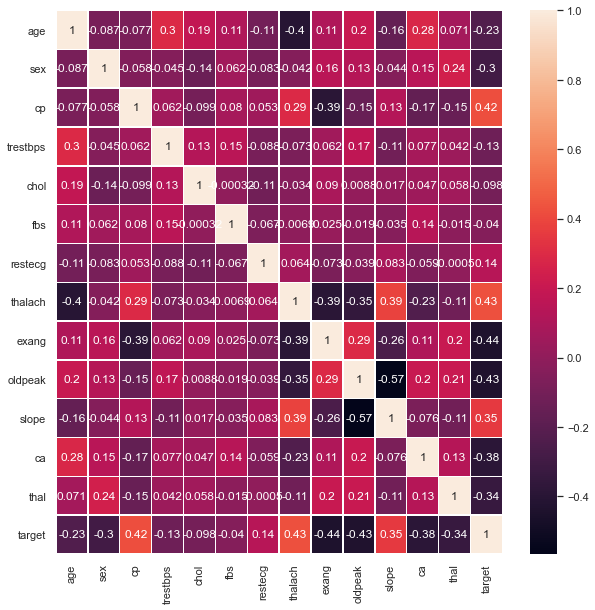

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corrmatrix, annot=True, linewidths=.5, ax=ax)

In [34]:
corr_matrix = df4.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
thalach     0.429515
cp          0.423500
slope       0.342376
restecg     0.135086
fbs        -0.032363
chol       -0.099005
trestbps   -0.122503
age        -0.228643
sex        -0.292736
thal       -0.339504
ca         -0.385613
oldpeak    -0.429522
exang      -0.440104
Name: target, dtype: float64

In [35]:
nor_corr = corr_matrix["target"]
nor_corr[(nor_corr<=0.3)&(nor_corr>=-0.3)]

age        -0.228643
sex        -0.292736
trestbps   -0.122503
chol       -0.099005
fbs        -0.032363
restecg     0.135086
Name: target, dtype: float64

In [36]:
X=df4.drop('target',axis=1)
y=df4['target']
print(X.shape)
print(y.shape)

(296, 13)
(296,)


In [37]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
clf.feature_importances_

array([0.04184808, 0.02831613, 0.21008715, 0.00941711, 0.00520951,
       0.00067584, 0.00544479, 0.10472037, 0.10921681, 0.11386705,
       0.07472951, 0.12304336, 0.17342427])

In [39]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

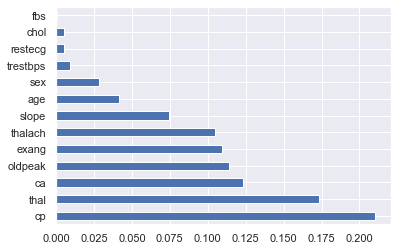

In [40]:
feat_importances = pd.Series(clf.feature_importances_,index =X.columns)
feat_importances.nlargest(13).plot(kind="barh")
plt.show()

In [41]:
X=X.drop(['fbs','chol','restecg','sex','age','trestbps'],axis=1)

In [42]:
X.head()

,cp,thalach,exang,oldpeak,slope,ca,thal
0,3,150,0,2.3,0,0,1
1,2,187,0,3.5,0,0,2
2,1,172,0,1.4,2,0,2
3,1,178,0,0.8,2,0,2
4,0,163,1,0.6,2,0,2


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=5)
print(X_train.shape)
print(y_test.shape)

(236, 7)
(60,)


In [44]:
y_dist = Counter(y)
y_train_dist =Counter(y_train)
y_test_dist =Counter(y_test)
print (y_dist)
print (y_train_dist)
print (y_test_dist)

Counter({1: 163, 0: 133})
Counter({1: 130, 0: 106})
Counter({1: 33, 0: 27})


In [45]:
model1=DecisionTreeClassifier()
model2=LogisticRegression(solver='liblinear',multi_class = 'auto')
model3=RandomForestClassifier()
model4=GaussianNB()
model5=KNeighborsClassifier()
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')

param={'tree__criterion':["entropy","gini"],'tree__max_depth':[5,8,9]
       ,'lg__C': [1,5,10]
       ,'rf__n_estimators':[1,5,10],'rf__max_depth':[5,8,9]
       ,'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}


grid = GridSearchCV(estimator=e_model, param_grid=param, cv=5, verbose=0)
grid = grid.fit(X_train, y_train)

In [46]:
grid.best_params_

{'knn__n_neighbors': 1,
 'lg__C': 1,
 'rf__max_depth': 9,
 'rf__n_estimators': 5,
 'tree__criterion': 'gini',
 'tree__max_depth': 5}

In [47]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

model1=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
model2=LogisticRegression(solver='liblinear',multi_class = 'auto',C=1,random_state=1)
model3=RandomForestClassifier(max_depth=9,n_estimators=5,random_state=1)
model4=GaussianNB()
model5=KNeighborsClassifier(n_neighbors = 1)
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')



classifiers = [model1,model2,model3,model4,model5,e_model]

for name, model in zip(clf_names, classifiers):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print ("classifier: ", name)
    print ("mean accuracy: ", score)

classifier:  DecisionTree
mean accuracy:  0.8333333333333334
classifier:  Logistic Regression
mean accuracy:  0.9333333333333333
classifier:  Random Forest
mean accuracy:  0.85
classifier:  Naive_bayes
mean accuracy:  0.8833333333333333
classifier:  KNeighbor
mean accuracy:  0.7333333333333333
classifier:  Ensemble
mean accuracy:  0.9166666666666666


In [48]:
y_pred=e_model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        33

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22,  5],
       [ 2, 31]], dtype=int64)

In [50]:
y_pred_tree=model1.predict(X_test)
y_pred_lg=model2.predict(X_test)
y_pred_rf=model3.predict(X_test)
y_pred_nb=model4.predict(X_test)
y_pred_knn=model5.predict(X_test)
y_pred_e=e_model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test,y_pred_tree)
cm_lg = confusion_matrix(y_test,y_pred_lg)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_e = confusion_matrix(y_test,y_pred_e)

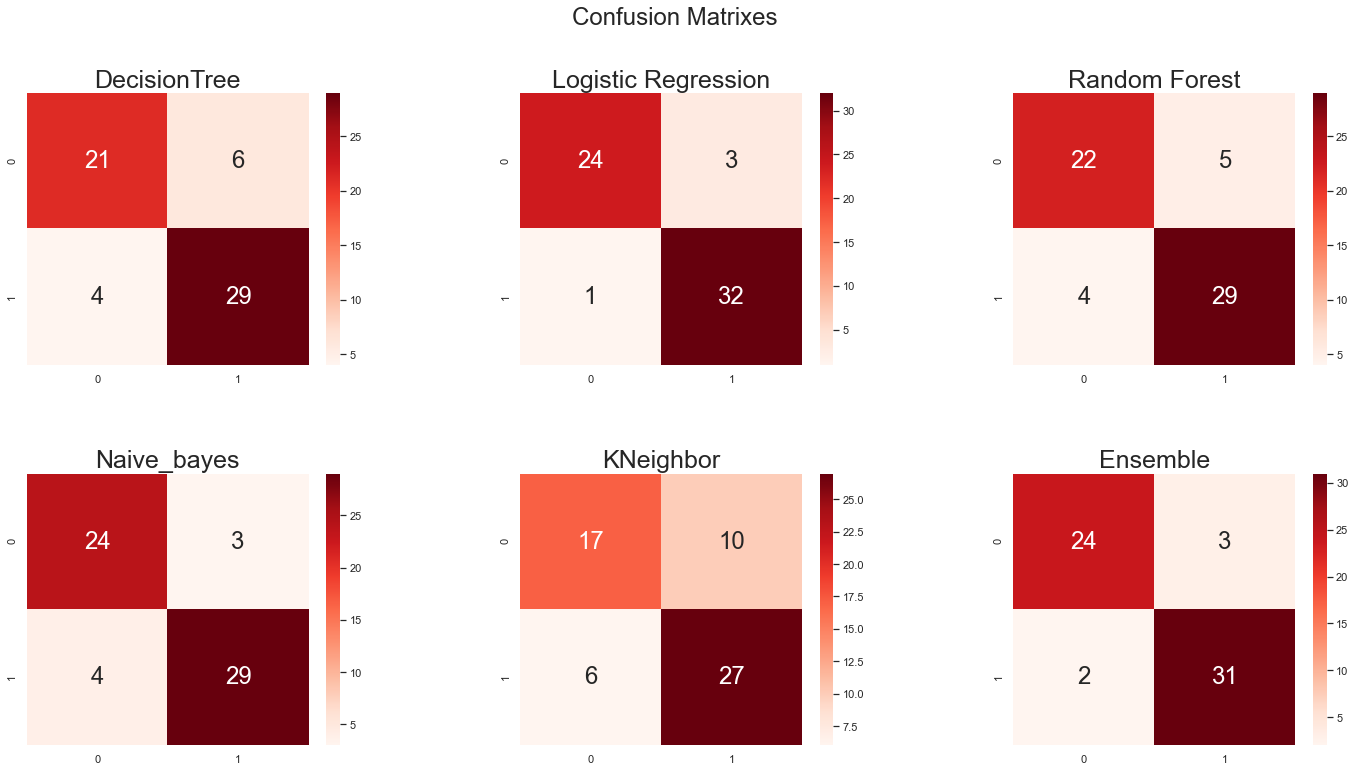

In [52]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("DecisionTree",size=25)
sns.heatmap(cm_tree,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression",size=25)
sns.heatmap(cm_lg,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest",size=25)
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive_bayes",size=25)
sns.heatmap(cm_nb,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("KNeighbor",size=25)
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Ensemble",size=25)
sns.heatmap(cm_e,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.show()

# StandardScaler

In [53]:
X=df4.drop('target',axis=1)
y=df4['target']
print(X.shape)
print(y.shape)

(296, 13)
(296,)


In [54]:
X.var()

age           82.679421
sex            0.213639
cp             1.070454
trestbps     283.690781
chol        2112.117258
fbs            0.124588
restecg        0.276580
thalach      507.596507
exang          0.221060
oldpeak        1.312814
slope          0.377462
ca             1.037838
thal           0.375034
dtype: float64

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scal=scaler.fit_transform(X)
X_scal.var()

1.0

In [56]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2,stratify=y, random_state=5)
print(X_train.shape)
print(y_test.shape)

(236, 13)
(60,)


In [58]:
y_dist = Counter(y)
y_train_dist =Counter(y_train)
y_test_dist =Counter(y_test)
print (y_dist)
print (y_train_dist)
print (y_test_dist)

Counter({1: 163, 0: 133})
Counter({1: 130, 0: 106})
Counter({1: 33, 0: 27})


In [59]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [60]:
model1=DecisionTreeClassifier()
model2=LogisticRegression(solver='liblinear',multi_class = 'auto')
model3=RandomForestClassifier()
model4=GaussianNB()
model5=KNeighborsClassifier()
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')

param={'tree__criterion':["entropy","gini"],'tree__max_depth':[5,8,9]
       ,'lg__C': [1,5,10]
       ,'rf__n_estimators':[1,5,10],'rf__max_depth':[5,8,9]
       ,'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}


grid = GridSearchCV(estimator=e_model, param_grid=param, cv=5, verbose=0)
grid = grid.fit(X_train, y_train)

In [61]:
grid.best_params_

{'knn__n_neighbors': 1,
 'lg__C': 10,
 'rf__max_depth': 5,
 'rf__n_estimators': 5,
 'tree__criterion': 'entropy',
 'tree__max_depth': 9}

In [62]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

model1=DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=1)
model2=LogisticRegression(solver='liblinear',multi_class = 'auto',C=10,random_state=1)
model3=RandomForestClassifier(max_depth=5,n_estimators=5,random_state=1)
model4=GaussianNB()
model5=KNeighborsClassifier(n_neighbors = 1)
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')



classifiers = [model1,model2,model3,model4,model5,e_model]

for name, model in zip(clf_names, classifiers):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print ("classifier: ", name)
    print ("mean accuracy: ", score)

classifier:  DecisionTree
mean accuracy:  0.7666666666666667
classifier:  Logistic Regression
mean accuracy:  0.9
classifier:  Random Forest
mean accuracy:  0.8666666666666667
classifier:  Naive_bayes
mean accuracy:  0.8333333333333334
classifier:  KNeighbor
mean accuracy:  0.6666666666666666
classifier:  Ensemble
mean accuracy:  0.8333333333333334


In [63]:
y_pred=model2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        33

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [64]:
y_pred_tree=model1.predict(X_test)
y_pred_lg=model2.predict(X_test)
y_pred_rf=model3.predict(X_test)
y_pred_nb=model4.predict(X_test)
y_pred_knn=model5.predict(X_test)
y_pred_e=e_model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(y_test,y_pred_tree)
cm_lg = confusion_matrix(y_test,y_pred_lg)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_e = confusion_matrix(y_test,y_pred_e)

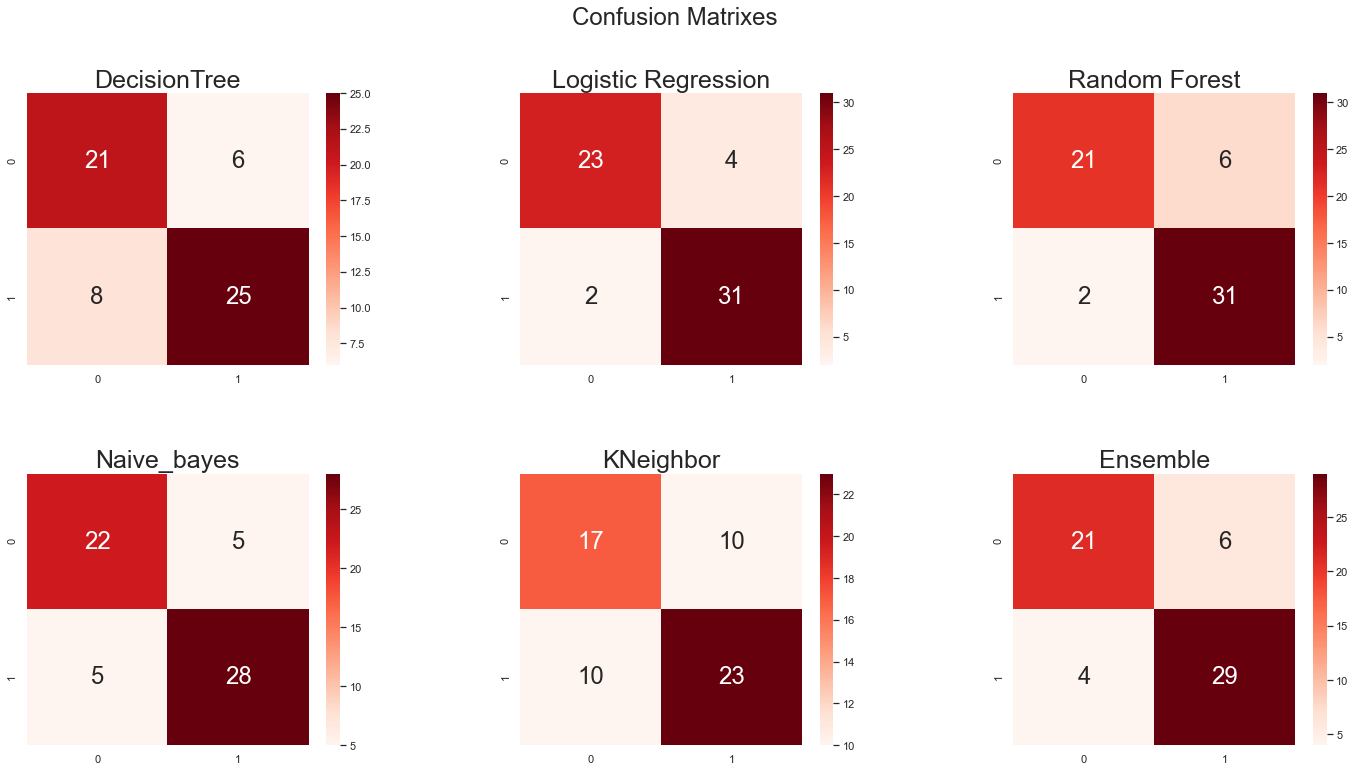

In [65]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("DecisionTree",size=25)
sns.heatmap(cm_tree,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression",size=25)
sns.heatmap(cm_lg,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest",size=25)
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive_bayes",size=25)
sns.heatmap(cm_nb,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("KNeighbor",size=25)
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Ensemble",size=25)
sns.heatmap(cm_e,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.show()

# StandardScaler_Feature Importance

In [66]:
X=df4.drop('target',axis=1)
y=df4['target']
print(X.shape)
print(y.shape)

(296, 13)
(296,)


In [67]:
X=X.drop(['fbs','chol','restecg','sex','age','trestbps'],axis=1)

In [68]:
X.var()

cp           1.070454
thalach    507.596507
exang        0.221060
oldpeak      1.312814
slope        0.377462
ca           1.037838
thal         0.375034
dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scal=scaler.fit_transform(X)
X_scal.var()

1.0

In [70]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2,stratify=y, random_state=5)
print(X_train.shape)
print(y_test.shape)

(236, 7)
(60,)


In [71]:
y_dist = Counter(y)
y_train_dist =Counter(y_train)
y_test_dist =Counter(y_test)
print (y_dist)
print (y_train_dist)
print (y_test_dist)

Counter({1: 163, 0: 133})
Counter({1: 130, 0: 106})
Counter({1: 33, 0: 27})


In [72]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [73]:
model1=DecisionTreeClassifier()
model2=LogisticRegression(solver='liblinear',multi_class = 'auto')
model3=RandomForestClassifier()
model4=GaussianNB()
model5=KNeighborsClassifier()
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')

param={'tree__criterion':["entropy","gini"],'tree__max_depth':[5,8,9]
       ,'lg__C': [1,5,10]
       ,'rf__n_estimators':[1,5,10],'rf__max_depth':[5,8,9]
       ,'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}


grid = GridSearchCV(estimator=e_model, param_grid=param, cv=5, verbose=0)
grid = grid.fit(X_train, y_train)

In [74]:
grid.best_params_

{'knn__n_neighbors': 7,
 'lg__C': 5,
 'rf__max_depth': 5,
 'rf__n_estimators': 10,
 'tree__criterion': 'gini',
 'tree__max_depth': 5}

In [75]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

model1=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)
model2=LogisticRegression(solver='liblinear',multi_class = 'auto',C=5,random_state=1)
model3=RandomForestClassifier(max_depth=5,n_estimators=10,random_state=1)
model4=GaussianNB()
model5=KNeighborsClassifier(n_neighbors = 7)
e_model=VotingClassifier(estimators=[('tree', model1), ('lg', model2), ('rf', model3),('nb',model4),('knn',model5)]
                         , voting='hard')



classifiers = [model1,model2,model3,model4,model5,e_model]

for name, model in zip(clf_names, classifiers):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print ("classifier: ", name)
    print ("mean accuracy: ", score)

classifier:  DecisionTree
mean accuracy:  0.8333333333333334
classifier:  Logistic Regression
mean accuracy:  0.9333333333333333
classifier:  Random Forest
mean accuracy:  0.8833333333333333
classifier:  Naive_bayes
mean accuracy:  0.8833333333333333
classifier:  KNeighbor
mean accuracy:  0.9
classifier:  Ensemble
mean accuracy:  0.9333333333333333


In [76]:
y_pred=e_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        33

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [77]:
y_pred_tree=model1.predict(X_test)
y_pred_lg=model2.predict(X_test)
y_pred_rf=model3.predict(X_test)
y_pred_nb=model4.predict(X_test)
y_pred_knn=model5.predict(X_test)
y_pred_e=e_model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test,y_pred_tree)
cm_lg = confusion_matrix(y_test,y_pred_lg)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_e = confusion_matrix(y_test,y_pred_e)

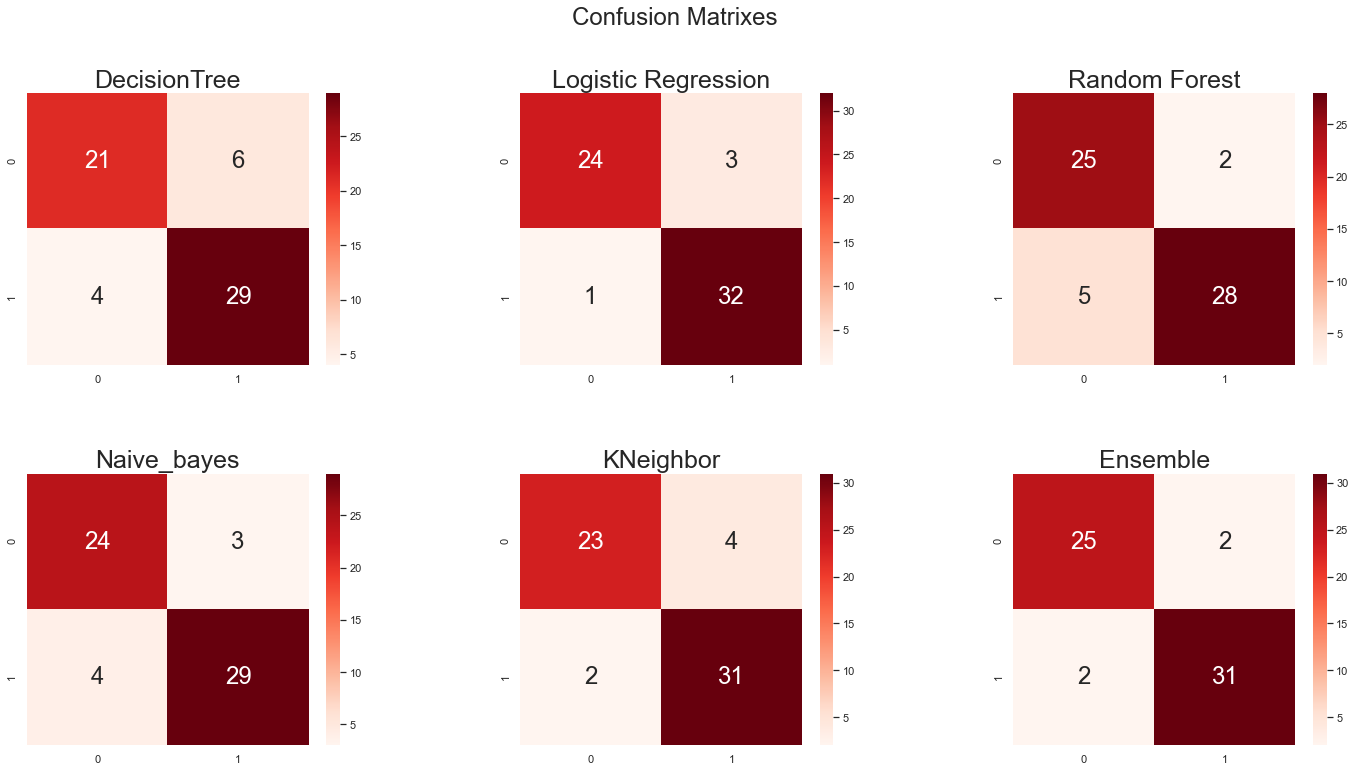

In [78]:
clf_names = ['DecisionTree','Logistic Regression','Random Forest','Naive_bayes','KNeighbor','Ensemble']

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("DecisionTree",size=25)
sns.heatmap(cm_tree,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression",size=25)
sns.heatmap(cm_lg,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest",size=25)
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive_bayes",size=25)
sns.heatmap(cm_nb,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("KNeighbor",size=25)
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Ensemble",size=25)
sns.heatmap(cm_e,annot=True,cmap="Reds",fmt="d", annot_kws={"size": 24})

plt.show()